## 0. Libraries 

In [1]:
import pandas as pd
import matplotlib
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Load Data 

In [3]:
#Load the data 
df = pd.read_csv("data/clean/final_translated_df.csv")

In [4]:
df.question.unique()

array(['In general, do you think women are treated with respect in Brazil?',
       'Do you think the treatment received is the same as that of man?',
       'In which social group is the woman most respected, in your opinion?',
       'Which of the following environments, do you think the woman is most disrespected?',
       'Of the types of domestic violence, which one considers the most serious?',
       'For you, in recent years, domestic and family violence against women:',
       'What does it lead a woman not to denounce the aggression?',
       'Where do you think women are less respected?',
       'For the past six months, have you heard more about domestic and family violence against women?',
       'And you think domestic and family violence against women has increased, because:',
       'How often do the situations below lead a woman not to report aggression?',
       'Do Brazilian law protect women from abuse and domestic violence?',
       'You consider that the creation 

## 2. Overview Data (Visualization)

In [6]:
df[df['category'] =='The violence lived / witnessed'].question.value_counts()

question
What was your attitude towards the last aggression?                                                          85
Regarding the bond, what is the aggressor yours?                                                             82
What was your age when you were first assaulted?                                                             70
And what was the type of violence suffered?                                                                  57
What motivated violence?                                                                                     53
And what was the type of violence suffered by the known person?                                              46
In his opinion, women who suffer aggression denounce the fact to the authorities:                            32
Have you ever suffered any kind of domestic or familiar violence caused by a man?                            30
And what led you to choose not to do anything?                                                 

In [32]:
def plot_trend_over_years(df, question):
    
    # Filter the DataFrame for the selected question
    trend_df = df[df["question"] == question]
    if trend_df.empty:
        print(f"⚠️ No data available for question: '{question}'")
        return
    
    df_pivot = trend_df.pivot(index="year", columns="answer", values="percentage")
    colors = ["#FF69B4", "#FF1493", "#C71585", "#800080", "#8A2BE2"]

    plt.figure(figsize=(12, 6))
    for i, answer in enumerate(df_pivot.columns):
        plt.plot(df_pivot.index, df_pivot[answer], marker='o', label=answer, color=colors[i % len(colors)])

    plt.title(f"{question} Distribution Over the Years", fontsize=14, fontweight='bold', color="#800080")
    plt.xlabel("Year", fontsize=12, fontweight='bold', color="#C71585")
    plt.ylabel("Percentage", fontsize=12, fontweight='bold', color="#C71585")
    plt.legend(title="Answer Groups", title_fontsize=12, fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


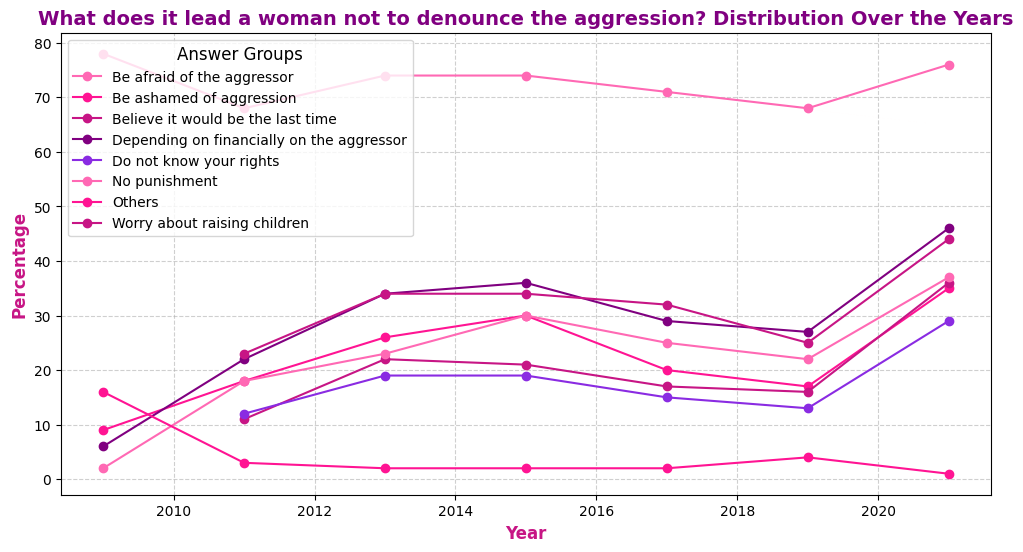

In [16]:
plot_trend_over_years(df, 'What does it lead a woman not to denounce the aggression?')


In [31]:
def plot_question_distribution(df, question, year=None, avg=False):

    # Filter the DataFrame for the selected question
    overview_df = df[df["question"] == question]
    if year:
        overview_df = overview_df[overview_df["year"] == year]
    if avg:
        overview_df = overview_df.groupby("answer", as_index=False)["percentage"].mean()
    if overview_df.empty:
        print(f"No data available for question: {question} in year: {year}")
        return

    df_pivot = overview_df.set_index("answer")[["percentage"]]
    num_colors = len(df_pivot)
    colors = plt.cm.PuRd(range(50, 250, max(1, 200 // num_colors))) 
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(df_pivot.index, df_pivot["percentage"], color=colors, width=0.6)
    title_text = f"Distribution of {question}" + (f" in {year}" if year else " (Average Across Years)" if avg else "")
    plt.title(title_text, fontsize=14, fontweight='bold', color="#800080")
    plt.xlabel("Answer", fontsize=12, fontweight='bold', color="#C71585")
    plt.ylabel("Percentage", fontsize=12, fontweight='bold', color="#C71585")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()


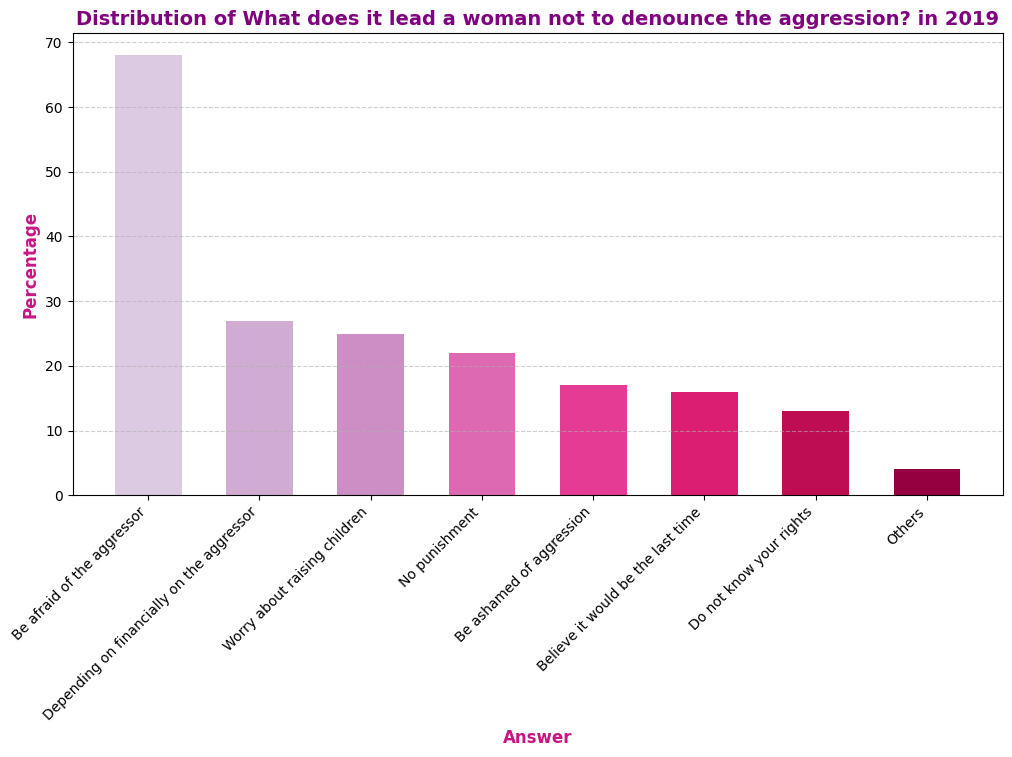

In [29]:
plot_question_distribution(df, 'What does it lead a woman not to denounce the aggression?', year=2019)


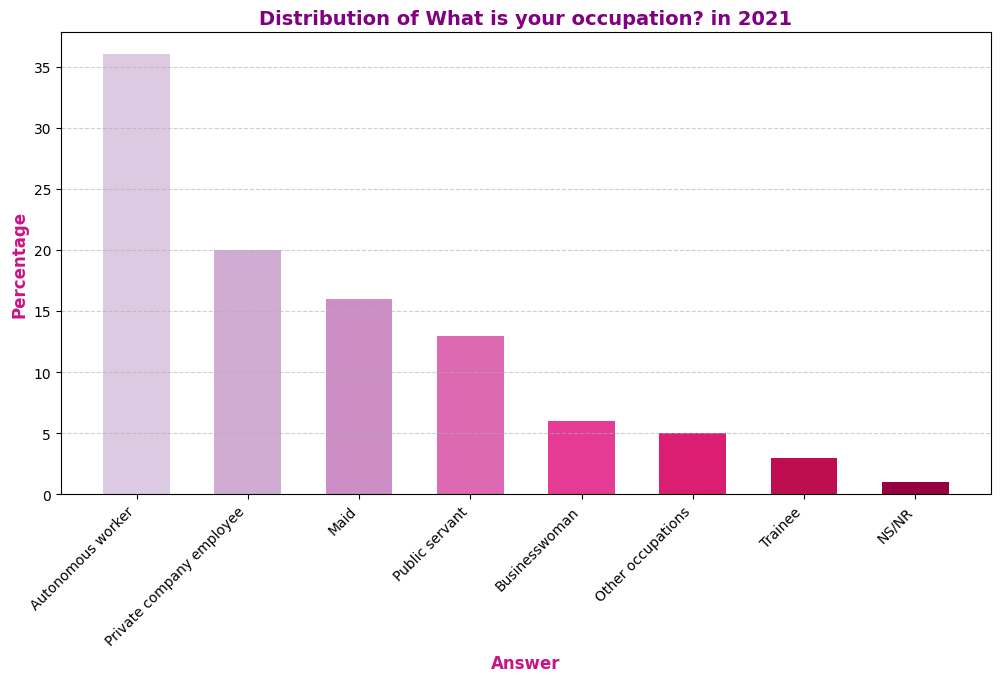

In [30]:
plot_question_distribution(df, "What is your occupation?", year=2021)


General perception of violence against women 

'In general, do you think women are treated with respect in Brazil?'
'For you, in recent years, domestic and family violence against women:'
'And what was the type of violence suffered?'
'What does it lead a woman not to denounce the aggression?'

The violence lived / witnessed

'Have you ever suffered any kind of domestic or familiar violence caused by a man?'
'And what was the type of violence suffered?'
'At the time of aggression, the aggressor was:'
'Has any friend, familiar or known have you suffered some kind of domestic or family violence?
'At the time of aggression, the aggressor was:'

Profile 

'What is your occupation?'
'How old are you?'                           
'Which region are you talking about?'                  
'What is your education?                              
'Federation unit'                                      
'What is your color or race?'                          
'What is your religion or belief?'                    
'What is your gross family income per month?'          
'What is your gross individual income per month?'      
'What is your marital status?'

Service and Support Network / Complaint

                                          
'In that case, who would you look first?'                                                                                                            
'You know or have heard of the protection services for women provided:'                                       
'If you witnessed an act of physical aggression to a woman, whom would you first denounce the aggression?'     
'Do you think the contents conveyed by the press help to reduce domestic violence against women?'              
'In your opinion, do women who suffer aggression often report the fact to the authorities?'                   
'Do you know any other women protection service?'  

Society and domestic and family violence

'What do you think society can do to decrease or prevent domestic and family violence against women?'
'If you witnessed an act of aggression against a woman, you would report:'
'In what situations would you report?'
'In general, you consider Brazil a country:'














In [44]:
# Define the categorized questions
question_categories = {
    "General perception of violence against women": [
        "In general, do you think women are treated with respect in Brazil?",
        "For you, in recent years, domestic and family violence against women:",
        "And what was the type of violence suffered?",
        "What does it lead a woman not to denounce the aggression?"
    ],
    "The violence lived / witnessed": [
        "Have you ever suffered any kind of domestic or familiar violence caused by a man?",
        "And what was the type of violence suffered?",
        "At the time of aggression, the aggressor was:",
        "Has any friend, familiar or known have you suffered some kind of domestic or family violence?",
        "At the time of aggression, the aggressor was:"
    ],
    "Profile": [
        "What is your occupation?",
        "How old are you?",                           
        "Which region are you talking about?",                  
        "What is your education?",                              
        "Federation unit",                                      
        "What is your color or race?",                          
        "What is your religion or belief?",                    
        "What is your gross family income per month?",          
        "What is your gross individual income per month?",      
        "What is your marital status?"
    ],
    "Service and Support Network / Complaint": [
        "In that case, who would you look first?",                                                                                                            
        "You know or have heard of the protection services for women provided:",                                       
        "If you witnessed an act of physical aggression to a woman, whom would you first denounce the aggression?",     
        "Do you think the contents conveyed by the press help to reduce domestic violence against women?",              
        "In your opinion, do women who suffer aggression often report the fact to the authorities?",                   
        "Do you know any other women protection service?"  
    ],
    "Society and domestic and family violence": [
        "What do you think society can do to decrease or prevent domestic and family violence against women?",
        "If you witnessed an act of aggression against a woman, you would report:",
        "In what situations would you report?",
        "In general, you consider Brazil a country:"
    ]
}